<a href="https://colab.research.google.com/github/alba-linares/rTFM/blob/main/GEE_humedales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo de índices sobre los humedales de estudio**

# **PREPARACIÓN**

## Cargar paquetes

In [ ]:
!pip install eefolium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 212.5 kB/s eta 0:00:00


In [ ]:
import ee

In [ ]:
import eefolium as geemap

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize(project='ee-albalinares20')

## Colección de capas

In [ ]:
zone01h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/albufera_honda')
zone02h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/albufera_nueva')
zone03h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/barranco_del_agua')
zone04h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/canada_de_las_norias')
zone05h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/cola_del_embalse_del_negratin')
zone06h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/charcones_de_punta_entinas')
zone07h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/humedales_de_baza')
zone08h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/laguna_de_la_gravera')
zone09h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/rambla_morales')
zone10h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/ribera_de_la_algaida')
zone11h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/rio_antas')
zone12h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/salinas_de_cabo_de_gata')
zone13h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/salar_de_los_canos')
zone14h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/salinas_de_cerrillos')
zone15h = ee.FeatureCollection('projects/ee-albalinares20/assets/hum/saladar_del_margen')

zone01b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_albufera_honda')
zone02b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_albufera_nueva')
zone03b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_barranco_del_agua')
zone04b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_canada_de_las_norias')
zone05b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_charcones_de_punta_entinas')
zone06b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_cola_del_embalse_del_negratin')
zone07b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_humedales_de_baza')
zone08b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_laguna_de_la_gravera')
zone09b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_rambla_morales')
zone10b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_ribera_de_la_algaida')
zone11b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_rio_antas')
zone12b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_saladar_del_margen')
zone13b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_salar_de_los_canos')
zone14b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_salinas_de_cabo_de_gata')
zone15b = ee.FeatureCollection('projects/ee-albalinares20/assets/buffer/buf_salinas_de_cerrillos')


Recuerda que hay que cambiar el nombre de la zona **aquí**:

In [ ]:
#Aquí se va cambiando la zona para el análisis
zone = zone15b
zonename = 'zone15b'

## Definir función para calcular el índice

Recuerda que hay que cambiar el índice **aquí**:


In [ ]:
index = 'ndvi' # ¡Recuerda ponerlo en minúsculas para seguir el mismo formato siempre!

def get_index(img):
  #return img.addBands(img.normalizedDifference(['SR_B2','SR_B4']).rename(index)) #NDWI: (G - N) / (G + N) = (SR_B2 - SR_B4) / (SR_B2 + SR_B4)
  return img.addBands(img.normalizedDifference(['SR_B4','SR_B3']).rename(index)) #NDVI: (N - R) / (N + R) = (SR_B4 - SR_B3) / (SR_B4 + SR_B3)
  #return img.addBands(img.normalizedDifference(['SR_B4','SR_B5']).rename(index)) #LSWI: (N - S1) / (N + S1) = (SR_B4 - SR_B5) / (SR_B4 + SR_B5)


# **CREACIÓN DE CAPAS Y .CSV**

## Mapas

In [ ]:
#Carga de la colección de imágenes Landsat 7 con reflectancia superficial filtrados por fecha y zona
l7collection = (
    ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') #SR = surface reflectance de Landsat 7
    .filterBounds(zone) #extensión, lo que encuadra a la capa
    .filterDate('1999-01-01','2021-12-31') #periodo en el que ha estado Landsat 7 recopilando imágenes
)

#CÁLCULO DEL ÍNDICE NDVI (Land Surface Water Index) PARA CADA IMAGEN EN LA COLECCIÓN, crea un mosaico de calidad basado en el NDVI y lo recorta según la zona definida. Posteriormente, calcula el promedio del NDVI para cada año en el rango de años especificado, almacenando las bandas resultantes en una lista llamada bands.

#           l7index = l7collection.map(get_NDVI) #.map es un loop. Para cada objeto de la lista, le aplica iterativamente la función get_NDVI
#clip es lo que lo encuadra dentro de la zona del humedal
#En base a la banda que hemos nombrado NDVI
#.Reducer.mean te escoge el valor medio en base a NDVI
#           composite = l7index.select(index).reduce(ee.Reducer.median()).rename(index).clip(zone)
#           band = composite.select('NDVI')

#PARA CALCULAR EL ÍNDICE EN VARIOS AÑOS:
bands = []

years = range(1999,2022) #Porque empieza a contar en 1999 y termina en 2021
for year in years:
  str_year=str(year)
  print(str_year)
  l7collection = (
    ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
    .filterBounds(zone)
    .filterDate(str_year + '-01-01',str_year + '-12-31')
)

  l7index = l7collection.map(get_NDVI)
  composite = l7index.select(index).reduce(ee.Reducer.median()).rename(index).clip(zone)

#SE ALMACENAN LAS BANDAS DE LAS IMÁGENES CON EL CÁLCULO DEL NDVI EN bands
  band = composite.select('NDVI')
  bands.append(band) #band tiene 23 elementos, uno para cada año

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [ ]:
vmin = band.reduceRegion(ee.Reducer.min(), zone).get('NDVI').getInfo()
print(vmin)

None


In [ ]:
vmax = band.reduceRegion(ee.Reducer.max(), zone).get('NDVI').getInfo()
print(vmax)

None


In [ ]:
#HACEMOS LOS MAPAS DE NDVI DE LA ZONA DEL BUFFER DEL HUMEDAL CON EL DESPLEGABLE POR AÑO
m = geemap.Map() # Inicializamos un mapa vacío
m.setOptions('SATELLITE')
m.centerObject(zone, zoom=15)
vis_params = {'min': vmin, 'max': vmax, 'palette':['#a6611a','#dfc27d','#f5f5f5','#80cdc1','#018571']} #Paleta: marrón, blanco y azul turquesa, principalmente

for posicion, banda in enumerate(bands):
  m.addLayer(banda,vis_params,'NDVI_'+str(1999 + posicion))
m.addLayerControl() # Para escoger qué mapas ver con un desplegable para los distintos años

m

## Cálculo y exportación de la gráfica del NDVI medio anual en la zona

In [ ]:
#VALORES NDVI PARA LA ZONA DEL HUMEDAL EN CADA AÑO
data_zone = []
for band in bands:
  data_zone.append(band.reduceRegion(ee.Reducer.median(), zone, 30).get('NDVI').getInfo())
data_zone

[0.036127453146154107,
 0.0410427726147361,
 0.04198284775235524,
 0.03414121971641214,
 0.06347989794848317,
 0.04780433222991768,
 0.05173867768903074,
 0.05373560034369519,
 0.041977832453037725,
 0.04587602156187114,
 0.05369404832178244,
 0.04784565069203393,
 0.05177489543795268,
 0.04400406000291608,
 0.04976688980101313,
 0.05758652849136502,
 0.04782789296945277,
 0.047861076442772946,
 0.04785946274540249,
 0.049816364730014114,
 0.04779121263136416,
 0.04789445021612078,
 0.043985240656312305]

(0.0, 0.3)

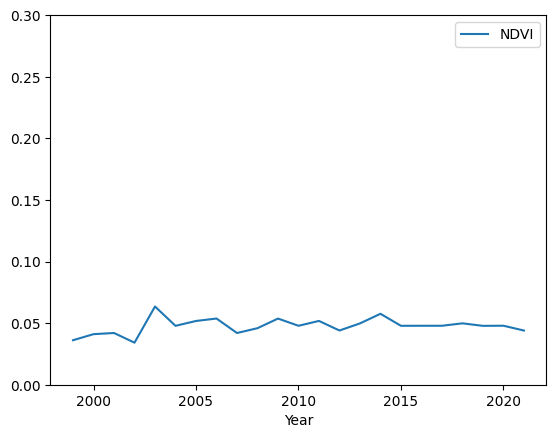

In [ ]:
#GRAFICA PARA VER LOS DATOS
import pandas as pd

df = pd.DataFrame({'NDVI': data_zone}, index=range(1999,2022))
df.index = df.index.rename('Year') #para saber que cada fila corresponde a cada año

graf = df.plot()
graf.set_ylim(0, 0.3)


In [ ]:

# Mostrar el gráfico
#plt.show()

## Mann-Kendall

In [ ]:
#GENERAMOS UNA VARIABLE ÚNICA QUE CONTENGA LAS DIFERENTES CAPAS (bands)
stack_collection = ee.ImageCollection(bands)
indexes = stack_collection.toBands()

In [ ]:
#CALCULAMOS TAU PARA CONOCER LA TENDENCIA DEL HUMEDAL
index_trend = indexes.reduce(ee.Reducer.kendallsCorrelation())
tau = index_trend.select('tau')

**¿Cómo se pone vmin y vmax al tau?**

In [ ]:
#vmin = band.reduceRegion(ee.Reducer.min(), zone).get('Mann-Kendal').getInfo()
#print(vmin)

In [ ]:
#vmax = band.reduceRegion(ee.Reducer.max(), zone).get('tau').getInfo()
#print(vmax)

In [ ]:
#GENERAMOS UN MAPA QUE MUESTRE EL TAU DE CADA PÍXEL DEL BUFFER DEL HUMEDAL
# Los valores negativos indican una tendencia decreciente y los valores positivos indican una tendencia creciente

m = geemap.Map()
m.setOptions('SATELLITE')
m.centerObject(zone, zoom=15)
vis_params = {'min': -1, 'max': 1, 'palette': ['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']} # Paleta de colores: rojos = negativos, blanco = 0 y azules = positivos.
m.addLayer(tau, vis_params, 'Mann-Kendal')
m.addLayerControl()
m

##Exportar:

In [ ]:
#EXPORTAMOS EN TIFF
for i, band in enumerate(bands):
  geemap.ee_export_image_to_drive(
      band, zonename+'_'+index+'_'+str(1999+i), folder='GEE_ECOINF', region=zone.geometry(),scale=30
  ) # Nos da 23 mapas raster, uno para cada año
  # .geometry() y no se pone solamente zone, porque region= te pide una propiedad de geometría de un objeto

Exporting zone15b_NDVI_1999 ...
Exporting zone15b_NDVI_2000 ...
Exporting zone15b_NDVI_2001 ...
Exporting zone15b_NDVI_2002 ...
Exporting zone15b_NDVI_2003 ...
Exporting zone15b_NDVI_2004 ...
Exporting zone15b_NDVI_2005 ...
Exporting zone15b_NDVI_2006 ...
Exporting zone15b_NDVI_2007 ...
Exporting zone15b_NDVI_2008 ...
Exporting zone15b_NDVI_2009 ...
Exporting zone15b_NDVI_2010 ...
Exporting zone15b_NDVI_2011 ...
Exporting zone15b_NDVI_2012 ...
Exporting zone15b_NDVI_2013 ...
Exporting zone15b_NDVI_2014 ...
Exporting zone15b_NDVI_2015 ...
Exporting zone15b_NDVI_2016 ...
Exporting zone15b_NDVI_2017 ...
Exporting zone15b_NDVI_2018 ...
Exporting zone15b_NDVI_2019 ...
Exporting zone15b_NDVI_2020 ...
Exporting zone15b_NDVI_2021 ...


In [ ]:
#CONECTAR GOOGLE COLAB CON DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#EXPORTAR DATOS ANUALES DE NDVI
df.to_csv('/content/drive/My Drive/GEE_ECOINF/'+index+'_'+zonename+'.csv')

In [ ]:
#EXPORTAMOS A DRIVE EL MAPA CON LOS VALORES DE TAU
geemap.ee_export_image_to_drive(
    tau, index+'_'+zonename+'_tau', folder='GEE_ECOINF',region=zone.geometry(), scale=30
)

Exporting NDVI_zone15b_tau ...
